In [1]:
"""
NEWAnk: Dataset usual
NEWAnk_SCRAMBLED: Permutacion al azar de aminoacidos
NEWAnk_UNIFORM: Aminoacidos elegidos al azar
"""

'\nNEWAnk: Dataset usual\nNEWAnk_SCRAMBLED: Permutacion al azar de aminoacidos\nNEWAnk_UNIFORM: Aminoacidos elegidos al azar\n'

In [2]:
import pandas as pd
import seaborn as sns

# sns.set_style("darkgrid")
sns.set_style("whitegrid")

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]= (8, 6)

In [3]:
import analysis_utils as autils

In [4]:
# TODO: Algunas funciones deberian ir en "analysis_utils"
from compare_rules import all_mrs_from_transactions, generic_set_intersection , \
    fast_list_intersection, mrs_txs_interseccion_lev_1, \
    mrs_txs_frecuencia_mayor_set, mrs_txs_frecuencia_mayor_list

In [6]:
transactions_newank = autils.read_clean_transactions("NEWAnk_len4_ALL_sub", "output/clean_transactions")

In [7]:
transactions_newank_scrambled = autils.read_clean_transactions("NEWAnk_SCRAMBLED_len4_ALL_sub", "output/clean_transactions")

In [8]:
transactions_newank_uniform = autils.read_clean_transactions("NEWAnk_UNIFORM_len4_ALL_sub", "output/clean_transactions")

In [9]:
assert len(transactions_newank) == 32169
assert len(transactions_newank_scrambled) == 32169
assert len(transactions_newank_uniform) == 32169

In [10]:
mrs_newank = all_mrs_from_transactions(transactions_newank)
mrs_newank_scrambled = all_mrs_from_transactions(transactions_newank_scrambled)
mrs_newank_uniform = all_mrs_from_transactions(transactions_newank_uniform)

In [11]:
mrs_newank_unique = set(mrs_newank)
mrs_newank_scrambled_unique = set(mrs_newank_scrambled)
mrs_newank_uniform_unique = set(mrs_newank_uniform)

In [12]:
print("Unique MRs")
print("mrs_newank_unique:          ", len(mrs_newank_unique))
print("mrs_newank_scrambled_unique:", len(mrs_newank_scrambled_unique))
print("mrs_newank_uniform_unique:  ", len(mrs_newank_uniform_unique))
# En la interseccion van a estar [casi] todos

Unique MRs
mrs_newank_unique:           158107
mrs_newank_scrambled_unique: 159639
mrs_newank_uniform_unique:   160000


In [15]:
# Exp6. Distribucion del largo de transacciones
input_transaction_len = {
    "NEWAnk": transactions_newank,
    "NEWAnk_SCRAMBLED": transactions_newank_scrambled,
    "NEWAnk_UNIFORM": transactions_newank_uniform
}

df_txs_length = autils.build_transaction_len_df(input_transaction_len)

Building transaction_len_df for NEWAnk
Building transaction_len_df for NEWAnk_SCRAMBLED
Building transaction_len_df for NEWAnk_UNIFORM


<AxesSubplot:title={'center':'tx_length'}, xlabel='family'>

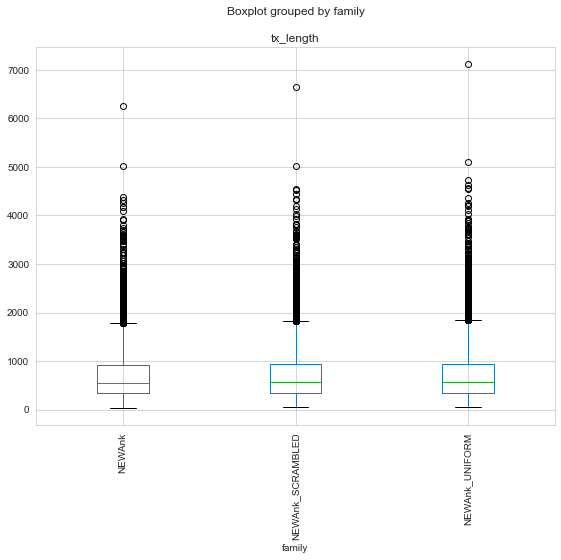

In [16]:
df_txs_length.boxplot(column='tx_length', by='family', grid=True, rot=90, figsize=(9, 7))

In [17]:
# Exp7. Distribucion de largo promedio de los MRs

In [18]:
input_build_mr_len = {
    "NEWAnk": mrs_newank_unique,
    "NEWAnk_SCRAMBLED": mrs_newank_scrambled_unique,
    "NEWAnk_UNIFORM": mrs_newank_uniform_unique
}

df_mrs_length = autils.build_mr_len_df(input_build_mr_len)

Building mr_len_df for NEWAnk
Building mr_len_df for NEWAnk_SCRAMBLED
Building mr_len_df for NEWAnk_UNIFORM


In [19]:
df_mrs_length.groupby(['family', 'mr_length']).agg({'mr_length': 'count'})
# Son [casi] todos de largo 4. Esperado

mr_length
family           mr_length           
NEWAnk           4             158105
                 5                  2
NEWAnk_SCRAMBLED 4             159639
NEWAnk_UNIFORM   4             160000

In [20]:
# Exp10. Frecuencia de MRs de acuerdo al % de aparicion

In [21]:
input_build_mr_tx_frequency = {
    "NEWAnk": transactions_newank,
    "NEWAnk_SCRAMBLED": transactions_newank_scrambled,
    "NEWAnk_UNIFORM": transactions_newank_uniform
}

df_freq_data = autils.build_mr_tx_frequency_df(input_build_mr_tx_frequency)

Building mr_tx_frequency for NEWAnk
 .... freq_count .... 0/32169
 .... freq_count .... 10000/32169
 .... freq_count .... 20000/32169
 .... freq_count .... 30000/32169
Building mr_tx_frequency for NEWAnk_SCRAMBLED
 .... freq_count .... 0/32169
 .... freq_count .... 10000/32169
 .... freq_count .... 20000/32169
 .... freq_count .... 30000/32169
Building mr_tx_frequency for NEWAnk_UNIFORM
 .... freq_count .... 0/32169
 .... freq_count .... 10000/32169
 .... freq_count .... 20000/32169
 .... freq_count .... 30000/32169


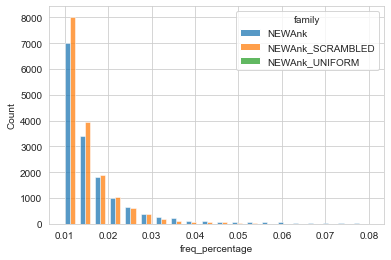

In [22]:
sns.histplot(df_freq_data, x='freq_percentage', hue='family', multiple='dodge', bins=20, binrange=(0.01, 0.08));
# Uniform ni aparece, tiene frecuencias menores a 0.01
# Scrambled y NEWAnk parecen comparables. Queda ver experimento de pares

In [23]:
# Exp10. Frecuencias de aparicion de pares de items

In [24]:
input_build_pairs_mr_tx_frequency = {
    "NEWAnk": transactions_newank,
    "NEWAnk_SCRAMBLED": transactions_newank_scrambled,
    "NEWAnk_UNIFORM": transactions_newank_uniform
}

min_support = 0.025
df_freq_pairs_data = autils.build_pairs_mr_tx_frequency_df(
    input_build_pairs_mr_tx_frequency, df_freq_data, min_support)

build_pairs_mr_tx_frequency_df, min_support: 0.025
Filtering mrs to get most frequents only
Building freqs_by_pair_combinations for NEWAnk...
Filtering transactions_frequents
 .... 0/32169
 .... 10000/32169
 .... 20000/32169
 .... 30000/32169
Building freqs_by_pair_data for NEWAnk...
NEWAnk ready.
Building freqs_by_pair_combinations for NEWAnk_SCRAMBLED...
Filtering transactions_frequents
 .... 0/32169
 .... 10000/32169
 .... 20000/32169
 .... 30000/32169
Building freqs_by_pair_data for NEWAnk_SCRAMBLED...
NEWAnk_SCRAMBLED ready.
WARNING! No frequent mrs for family: NEWAnk_UNIFORM
Building freqs_by_pair_combinations for NEWAnk_UNIFORM...
Filtering transactions_frequents
 .... 0/32169
 .... 10000/32169
 .... 20000/32169
 .... 30000/32169
Building freqs_by_pair_data for NEWAnk_UNIFORM...
NEWAnk_UNIFORM ready.


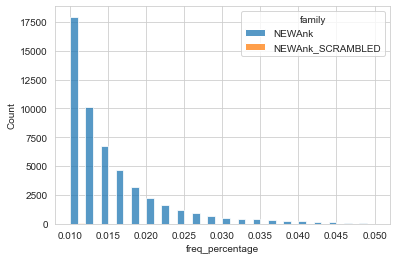

In [25]:
sns.histplot(df_freq_pairs_data, x='freq_percentage', hue='family', 
             multiple='dodge', bins=20, binrange=(0.010, 0.05));

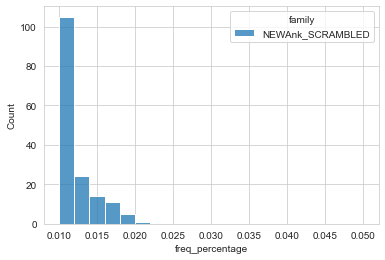

In [30]:
# Solo SCRAMBLED. Ningun par supera 0.025, por eso no genera reglas
sns.histplot(df_freq_pairs_data[df_freq_pairs_data.family == "NEWAnk_SCRAMBLED"], 
             x='freq_percentage', hue='family', 
             multiple='dodge', bins=20, binrange=(0.010, 0.05));